In [1]:
import numpy as np
import skimage.io as io
import skimage
from skimage import io, color, img_as_float

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2






In [2]:
import numpy as np

def color_filter(img):
    
    nimg = np.copy(img)
    rows , columns, channels= img.shape
    print(rows , columns, channels)
    
    
    for r in range(rows):   #for each column
       for c in range(columns):   
          red , green , blue , a = nimg[r,c]
          L , a , b = skimage.color.rgb2lab((red,green,blue))


          if np.abs(a) < 50 and np.abs(b) < 50:
                if L < 50:
                    nimg[r,c] = [ 150 , 150 , 150 , 255] #grey
                    #nimg[r,c] = [ 0 , 0 , 0 , 0] #black / transparent
                else:
                    nimg[r,c] = [ 255, 255, 255 , 255] #grey
                continue
            
          #print(r,c,"Lab",L,a,b)

        
          if b <= -50: 
                nimg[r,c] = [ 0, 0 , 255 , 255] #blue
          if b >=  50: 
                nimg[r,c] = [ 255, 255 , 0 , 255] #yellow
                
                
          if a <= -50: 
                nimg[r,c] = [ 0, 255 , 0 , 255] #green
          if a >=  50: 
                nimg[r,c] = [ 255, 0 , 0 , 255] #red

          #red , green , blue = skimage.color.lab2rgb((L,a,b))
          #nimg[r,c] = [ red , green , blue , 255] 

    return nimg


            
    
def filter_img(image_path):
    I = io.imread(image_path)
    if I.shape[2] == 3:
        I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    plt.imshow(I)
    plt.show()


    filtered = color_filter(I)
   
    plt.imshow(filtered)
    plt.show()

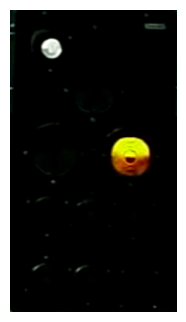

306 169 4


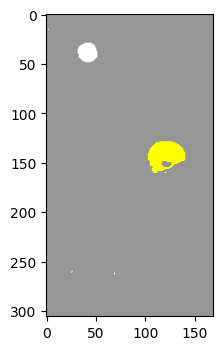

In [3]:
filter_img('data/traffic_light.png')

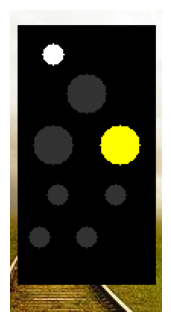

200 100 4


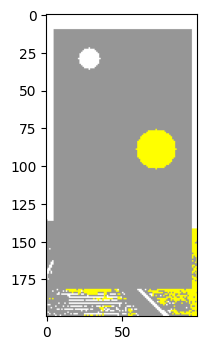

In [33]:
filter_img("data/gen-signals/kshauptsignal2_Ks2_vBw.png")

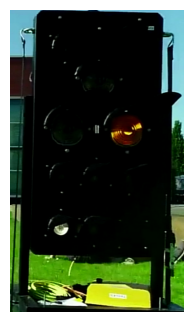

774 444 4


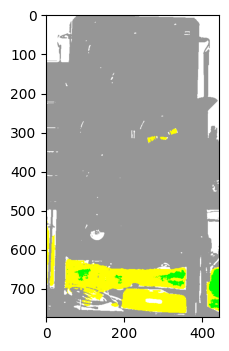

In [5]:
filter_img("data/drohne-signals/traffic_light0011.png")